In [1]:
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.autolayout'] = True
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
yf_prices = yf.download(['AAPL', 'MSFT', 'GOOG', 'META'], start='2012-01-01')

[*********************100%***********************]  4 of 4 completed


# 1. Single Asset Simulation

In [4]:
prices = yf_prices['Adj Close']['AAPL']
rs = prices.apply(np.log).diff(1).fillna(0)

In [5]:
rs

Date
2012-01-03    0.000000
2012-01-04    0.005360
2012-01-05    0.011040
2012-01-06    0.010400
2012-01-09   -0.001587
                ...   
2023-03-28   -0.003988
2023-03-29    0.019597
2023-03-30    0.009841
2023-03-31    0.015523
2023-04-03    0.000000
Name: AAPL, Length: 2831, dtype: float64

In [6]:
w1 = 5
w2 = 22
ma_x = prices.rolling(w1).mean() - prices.rolling(w2).mean()

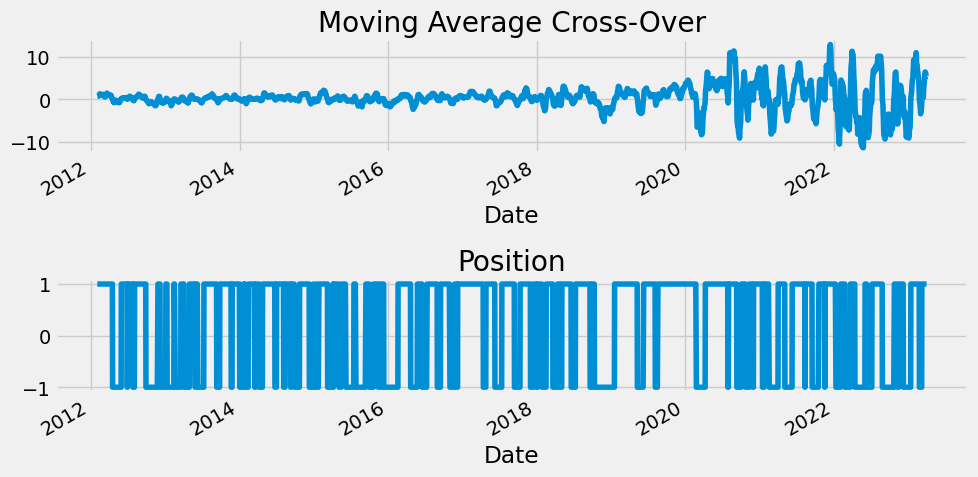

In [7]:
pos = ma_x.apply(np.sign)

fig, ax = plt.subplots(2,1)
ma_x.plot(ax=ax[0], title='Moving Average Cross-Over')
pos.plot(ax=ax[1], title='Position')
plt.savefig('tmp.png')

In [8]:
my_rs = pos.shift(1)*rs

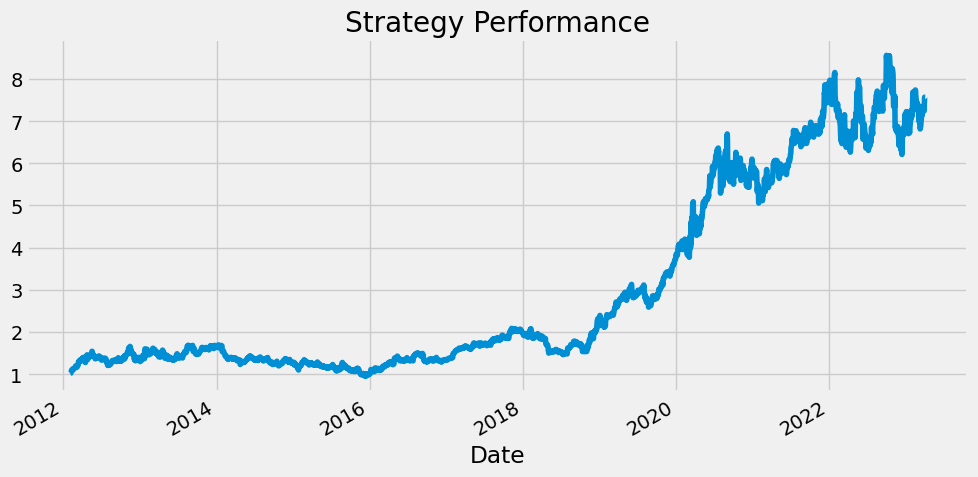

In [9]:
my_rs.cumsum().apply(np.exp).plot(title='Strategy Performance')
# rs.cumsum().apply(np.exp).plot()
# plt.legend(['my performance', 'benchmark performance'])
plt.savefig('tmp.png')

# 2. Multi-Assets Simulation

In [10]:
prices = yf_prices['Adj Close']
rs = prices.apply(np.log).diff(1).fillna(0)

In [11]:
w1 = 5
w2 = 22
ma_x = prices.rolling(w1).mean() - prices.rolling(w2).mean()

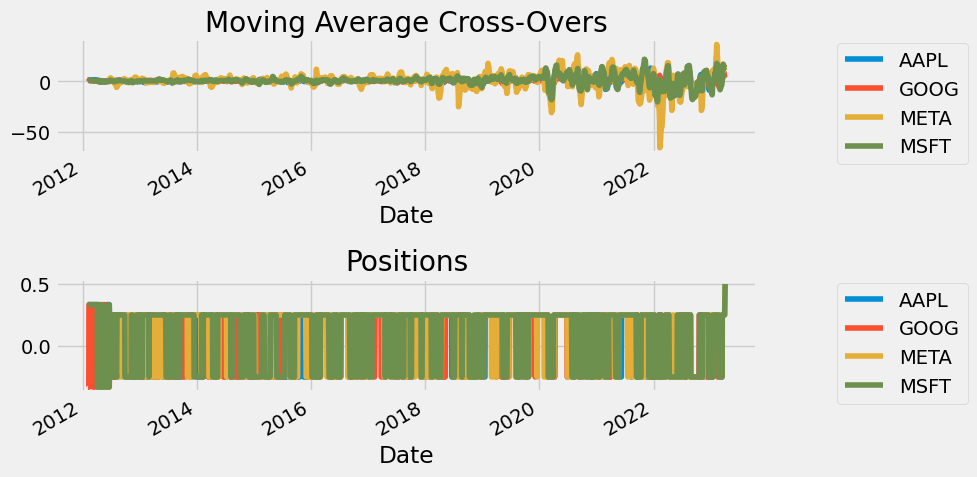

In [13]:
pos = ma_x.apply(np.sign)
pos /= pos.abs().sum(1).values.reshape(-1,1)

fig, ax = plt.subplots(2,1)
ma_x.plot(ax=ax[0], title='Moving Average Cross-Overs')
ax[0].legend(bbox_to_anchor=(1.1, 1.05))
pos.plot(ax=ax[1], title='Positions')
ax[1].legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('tmp.png')

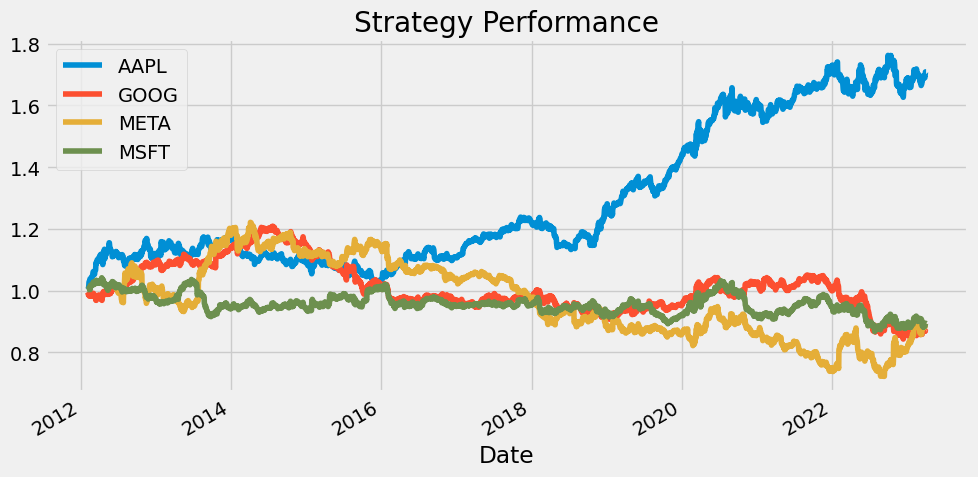

In [14]:
my_rs = (pos.shift(1)*rs)

my_rs.cumsum().apply(np.exp).plot(title='Strategy Performance')
# rs.mean(1).cumsum().apply(np.exp).plot()
# plt.legend(['my performance', 'benchmark performance'])
plt.savefig('tmp.png')

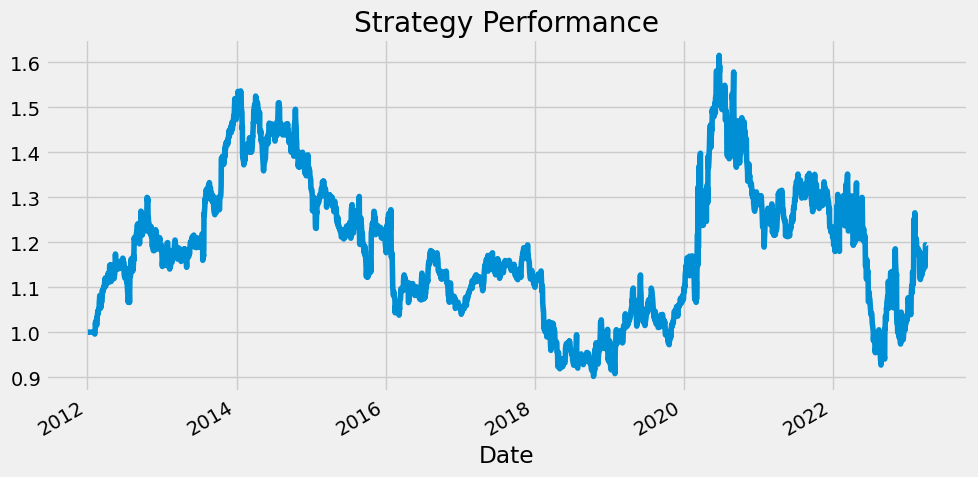

In [15]:
my_rs = (pos.shift(1)*rs).sum(1)

my_rs.cumsum().apply(np.exp).plot(title='Strategy Performance')
# rs.mean(1).cumsum().apply(np.exp).plot()
# plt.legend(['my performance', 'benchmark performance'])
plt.savefig('tmp.png')

**Look-ahead bias**

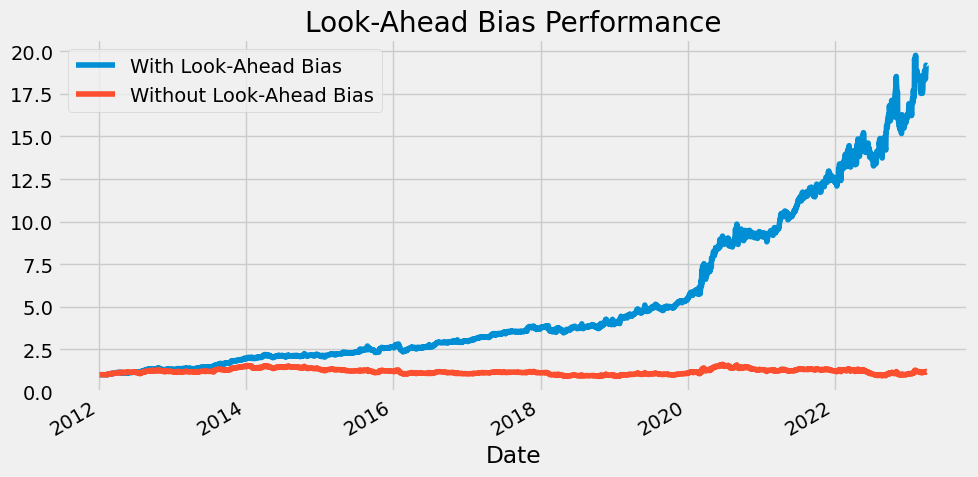

In [16]:
my_rs1 = (pos*rs).sum(1)
my_rs2 = (pos.shift(1)*rs).sum(1)

my_rs1.cumsum().apply(np.exp).plot(title='Look-Ahead Bias Performance')
my_rs2.cumsum().apply(np.exp).plot()
plt.legend(['With Look-Ahead Bias', 'Without Look-Ahead Bias'])
# rs.mean(1).cumsum().apply(np.exp).plot()
# plt.legend(['my performance', 'benchmark performance'])
plt.savefig('tmp.png')

# 3. Evaluating Strategy Robustness

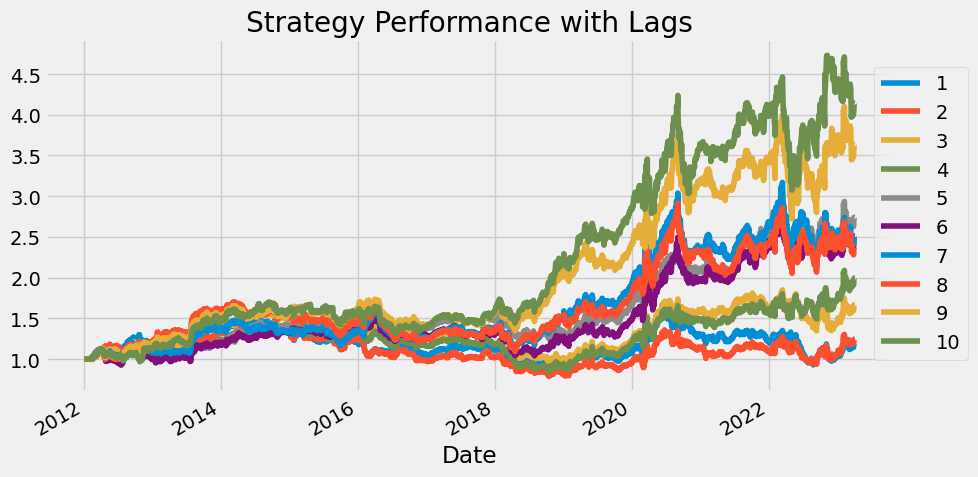

In [17]:
lags = range(1, 11)
lagged_rs = pd.Series(dtype=float, index=lags)

for lag in lags:
    my_rs = (pos.shift(lag)*rs).sum(1)
    my_rs.cumsum().apply(np.exp).plot()
    lagged_rs[lag] = my_rs.sum()

plt.title('Strategy Performance with Lags')    
plt.legend(lags, bbox_to_anchor=(1.1, 0.95))
plt.savefig('tmp.png')

# 4. Simulating Transaction Costs

In [18]:
tc_pct = 0.01

In [19]:
delta_pos = pos.diff(1).abs().sum(1)
my_tcs = tc_pct*delta_pos

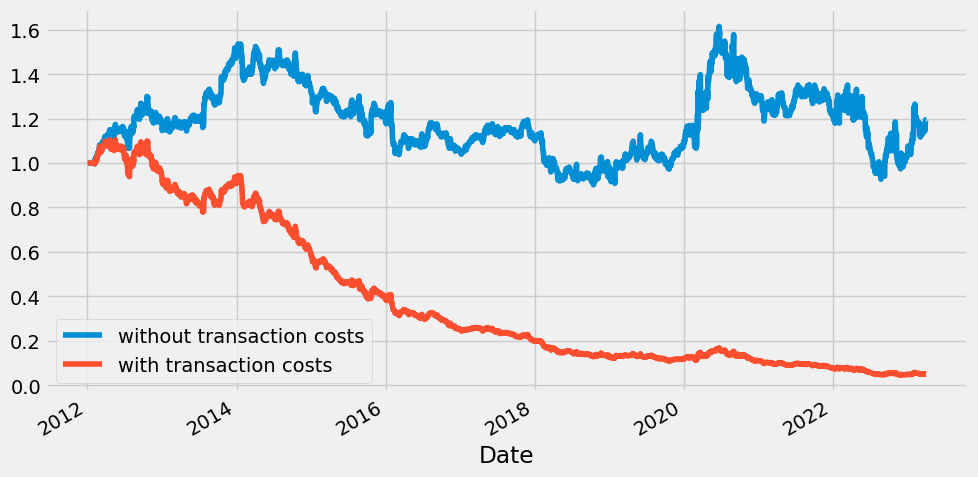

In [20]:
my_rs1 = (pos.shift(1)*rs).sum(1)
my_rs2 = (pos.shift(1)*rs).sum(1) - my_tcs

my_rs1.cumsum().apply(np.exp).plot()
my_rs2.cumsum().apply(np.exp).plot()
plt.legend(['without transaction costs', 'with transaction costs'])
plt.savefig('tmp.png')